In [1]:
import re
from bs4 import BeautifulSoup
import nltk
from collections import Counter
from konlpy.tag import *

kkma = Kkma()
hannanum = Hannanum()
komoran = Komoran()
okt = Okt()

In [47]:
data = open('chapter1_all.xml', encoding='UTF8')
data1 = BeautifulSoup(data, 'html.parser')

In [4]:
data_list = list(map(str, data1.findAll('char'))) # <char> 태그속에 글자들이 있다. 그들만 가져오자.

In [5]:
data_list_changed = list(map(lambda x: x.strip('</char>'), data_list)) # char 글자들을 모두 지우자.
data_list_changed = list(map(lambda x: x.strip(), data_list_changed)) # 양 끝쪽에 존재하는 스페이스나 괴상한 문자도 지우자.

In [7]:
problem_filter_result = list(filter(lambda x: re.search(r'^[0-9]+.*[\?]$', x), data_list_changed)) # 문제만 남기기
problem_filter_result = list(map(lambda x: re.sub(r'^[0-9]*\.\s', '', x), problem_filter_result)) # 문제 번호 지우기
problem_filter_result = list(map(lambda x : re.sub("다음 중\s", '', x), problem_filter_result)) # 다음 중도 지우기
problem_filter_result = list(map(lambda x : x.replace(" ", ""), problem_filter_result))
print(str(len(problem_filter_result)) + "개가 남는다.")
str_problem = "".join(problem_filter_result) # String으로 합치기

498개가 남는다.


In [9]:
token_1 = okt.nouns(str_problem)
Counter(token_1).most_common(1000)
filter_word = ['인터넷', '정보', '다음', '설정', '연결', '중', '컴퓨터', '대한', 
               '작업', '설명','기능', '경우', '사용', '관련', '가장', '위해', 
               '하나', '한글', '해당', '특징', '구성', '기법', 
               '방법', '방식', '한글', '거나', '통해', '을사', '한비', 
               '실행', '파일', '장치', '해하',
              '이용', '설치', '수행', '기술', '서비스', '시스템']
token_1_preprocess = list(filter(lambda x : len(x) > 1 and x not in filter_word, token_1))
counts = Counter(token_1_preprocess)
tags = counts.most_common(60)

In [10]:
token_2_preprocess = list(filter(lambda x : len(x) > 2 and x not in filter_word, token_1))
counts_2 = Counter(token_2_preprocess)
tags2 = counts_2.most_common(300)

In [11]:
from wordcloud import WordCloud
wc = WordCloud(font_path="C:/Windows/Fonts/나눔고딕/NanumGothic.ttf" ,background_color="white", max_font_size=60)
cloud = wc.generate_from_frequencies(dict(tags))

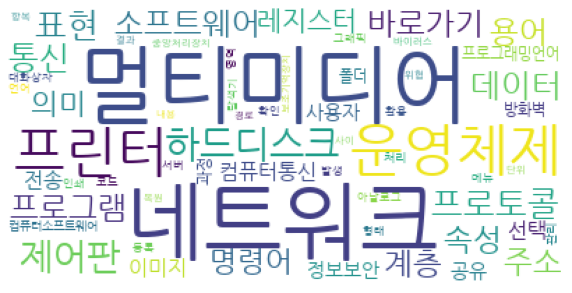

In [12]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,8))
plt.axis('off')
plt.imshow(cloud)
plt.show()

In [13]:
# 유형별로 키워드 매칭 Dict
type_dict = {'운영체제사용' : ['폴더검색', '운영체제', '프린터', '바로가기', '프로그램', '레지스터', '명령어', '탐색기', '방화벽', '바로가기', '전자우편', '키보드', '휴지통', '작업관리자', '보조프로그램', '구성요소', '연결프로그램', '레지스트리'],
            '컴퓨터시스템설정변경': ['장치관리자', '노트북', '네트워크', '프로토콜', '컴퓨터통신', '네트워크연결', '인터넷서버', '대화상자', '사용자', '시스템구성', '제어장치', '폴더옵션', '파일시스템', '관리도구'],
            '컴퓨터시스템관리': ['마이크로프로세서', '업그레이드', '파일형식', '입출력장치', '하드디스크', '컴퓨터관리', '제어판', '소프트웨어', '저장장치', '중앙처리장치', '컴퓨터소프트웨어', '아날로그', '보조기억장치', '메모리', '하드웨어', '컴퓨터시스템', '디지털신호', '주기억장치', '메인보드', '펌웨어'],
            '인터넷활용': ['정보통신', '통신회선', '송신데이터', '수신데이터', '반이중', '컴퓨터언어', '클라이언트', '프로그래밍언어', '인터넷서버', '인터넷서비스', '인터넷주소체계', '주소체계'],
             '멀티미디어활용': ['멀티미디어', '데이터', '이미지', '그래픽', '저작권', '그래픽데이터', '멀티미디어그래픽'],
             '최신정보통신기술활용': ['사물인터넷'],
             '정보보안유지': ['정보보안', '비밀키암호화기법', '공개키암호화기법', '비밀번호'],
             '시스템보안유지': ['바이러스']
}

In [14]:
not_added = []
result_dict = {key:[] for key in list(type_dict)}
for tag in list(map(lambda x:x[0], tags2)):
    added = False
    for type_ in list(type_dict):
        if tag in type_dict.get(type_):
            result_dict.get(type_).append(tag)
            added = True
    if added == False:
        not_added.append(tag)

https://wikidocs.net/50739   

단어 유사도를 파악해서 일정수준 이상 유사하면 저장하는 방식이 필요하다.

In [15]:
'프로토콜' in '인터넷프로토콜', '프로토콜' in ['인터넷프로토콜']

(True, False)

#### 아무리 추가해도 정말 하나하나 직접 추가해주어야 해서 한계가 있다.

In [16]:
len(not_added)

209

In [17]:
not_added # 추가되지 않은 단어들

['해결방법',
 '유니코드',
 '셰어웨어',
 '객체지향언어',
 '디지털',
 '파티션',
 '메모장',
 '코드체계',
 '암호화',
 '인트라넷',
 '시작메뉴',
 '인터넷프로토콜',
 '호스트',
 '사운드',
 '로부터',
 '객체지향',
 '프로그래밍',
 '주변장치',
 '해상도',
 '반도체',
 '대용량저장장치',
 '작업표시줄',
 '프록시',
 '디스크관리',
 '바탕화면',
 '순서대로',
 '문제점',
 '스마트폰',
 '무선인터넷',
 '연산장치',
 '유비쿼터스센서네트워크',
 '인쇄관리자',
 '도메인',
 '프로그램및기능',
 '동영상',
 '수신기',
 '디스크',
 '조각모음',
 '자료의표현',
 '시스템보안',
 '바르게',
 '하드웨어관리',
 '모니터',
 '시스템복구',
 '데이터베이스',
 '이미지표현방식',
 '비디오',
 '하이퍼미디어',
 '명령프롬프트',
 '유의사항',
 '컴퓨터그래픽',
 '전자음향장치',
 '디지털악기',
 '여러가지',
 '휴대폰',
 '데이터통신망',
 '시스템소프트웨어',
 '마우스',
 '사용권',
 '네트워크계층',
 '비디오데이터',
 '클럭주파수',
 '데이터전송',
 '그림판',
 '서브넷',
 '마스크',
 '네트워크장비',
 '보안센터',
 '보안설정',
 '응용프로그램',
 '장거리',
 '단말기',
 '라우터',
 '검색결과',
 '디스플레이',
 '컴퓨터게임',
 '상호작용',
 '대량의데이터',
 '네트워크프로토콜',
 '스캐너',
 '인터럽트',
 '가상기억장치',
 '소스코드',
 '개인설정',
 '문제해결',
 '검색상자',
 '아이디',
 '유비쿼터스컴퓨팅',
 '정보처리방식',
 '분산처리시스템',
 '정보통신기술',
 '정보사회',
 '스니핑',
 '인터넷주소',
 '네트워크운영방식',
 '사운드데이터의샘플링',
 '이미지데이터',
 '보안위협',
 '임베디드시스템',
 '셋업프로그램',
 '디렉토리',
 '네트워크망',
 '파일의검색기능',
 '

In [18]:
keys = [key for key in list(result_dict)]
values = [len(result_dict.get(value)) for value in list(result_dict)]
dict(zip(keys, values))

{'운영체제사용': 17,
 '컴퓨터시스템설정변경': 14,
 '컴퓨터시스템관리': 19,
 '인터넷활용': 12,
 '멀티미디어활용': 7,
 '최신정보통신기술활용': 1,
 '정보보안유지': 4,
 '시스템보안유지': 1}

In [19]:
print("분류된 갯수 : " + str(sum(values)))
print("총 갯수: " + str(len(tags2)))

분류된 갯수 : 75
총 갯수: 283


#### 21.05.05 목적
- type_dict 에 담겨있는 키워드를 중심으로 유사도를 파악해서 유사도 높은쪽으로 들어가는 방식

In [20]:
filter_word = ['인터넷', '정보', '다음', '설정', '연결', '중', '컴퓨터', '대한', 
               '작업', '설명','기능', '경우', '사용', '관련', '가장', '위해', 
               '하나', '한글', '해당', '특징', '구성', '기법', 
               '방법', '방식', '한글', '거나', '통해', '을사', '한비', 
               '실행', '파일', '장치', '해하', '다른', '도록', '뜻', 
              '이용', '설치', '수행', '기술', '서비스', '시스템',
              '의', '를', '용해', '및', '관', '것', '개', '관련',
               '과', '설명', '용어', '위', '안', '때', '확인', '여부', '면서']

In [21]:
result = []
for i in range(len(problem_filter_result)):
    token_list = okt.pos(problem_filter_result[i], stem=True, norm=True)
    temp = []
    for word in token_list:
        if (word[1] in ["Noun"]) and (word[0] not in filter_word):
            temp.append((word[0]))
            
    if temp:
        result.append(temp)

In [22]:
len(result)

477

In [23]:
result

[['사운드', '압축', '복원'],
 ['컴퓨터게임', '훈련', '사용자', '상호작용', '진행', '상황', '제어', '멀티미디어'],
 ['정보보안', '비밀키암호화기법'],
 ['분산', '거부', '공격'],
 ['대량의데이터', '패턴', '로부터', '가치', '추출', '의미'],
 ['네트워크프로토콜'],
 ['인터넷서버', '경로', '추적', '명령어', '결과'],
 ['주소'],
 ['객체지향', '프로그래밍'],
 ['코드'],
 ['중앙처리장치', '주기억장치', '주변장치', '공유', '신뢰', '연산', '능력', '향상'],
 ['제어장치', '레지스터'],
 ['프린터', '출력', '해상도', '조절', '스캐너', '스캔', '해상도', '조절', '단위'],
 ['반도체', '보조기억장치', '크기', '작고', '충격', '소음', '발생', '대용량저장장치'],
 ['시스템구성'],
 ['폴더옵션', '창'],
 ['백업', '복원'],
 ['작업표시줄'],
 ['차원', '차원', '물체', '모형', '명암', '색상', '실감', '그래픽'],
 ['크기', '결정', '요소'],
 ['컴퓨터통신', '프록시', '서버'],
 ['바이러스'],
 ['사물인터넷'],
 ['주소체계'],
 ['컴퓨터통신', '프로토콜'],
 ['객체지향', '프로그래밍언어'],
 ['코드'],
 ['펌웨어'],
 ['메인보드', '칩셋'],
 ['보조기억장치'],
 ['외부', '인터럽트', '발생'],
 ['레지스터'],
 ['운영체제', '파일시스템'],
 ['관리도구', '컴퓨터관리', '디스크관리'],
 ['폴더', '속성', '창', '내용'],
 ['복원'],
 ['컴퓨터시스템', '가상기억장치'],
 ['멀티미디어'],
 ['코드'],
 ['멀티미디어', '선택', '이미지', '이미지', '이미지', '자연', '변화', '특수', '효과'],
 ['컴퓨터통신'],
 ['소스코드', '제공', '사용자', '

#### 477개로 학습이 부족하다.

In [85]:
from gensim.models import Word2Vec
model = Word2Vec(result,window=1, min_count=2, workers=4, sg=0)

In [130]:
model.wv.most_similar('공개키암호화기법')

[('시스템복구', 0.27189603447914124),
 ('웹', 0.245473250746727),
 ('마스크', 0.20847806334495544),
 ('정보보안', 0.20574435591697693),
 ('문제점', 0.200468048453331),
 ('공격', 0.19873753190040588),
 ('무선인터넷', 0.1982998549938202),
 ('유비쿼터스센서네트워크', 0.19622936844825745),
 ('바로가기', 0.18052111566066742),
 ('포함', 0.17538857460021973)]

- K-평균 군집화(K-means Clustering)
- 디비스캔 군집화(DBSCAN Clustering)
- 유사도 전파 군집화(Affinity Propagation Clustering)
- 스펙트럴 군집화(Spectral Clustering)
- 계층적 군집화(Hierarchical Clustering)

에서 k means 하나 필수로 쓰고 나머지 하나 적용해서 해보기.  
학습 데이터를 늘리기 위해 선택지도 추가해보기  
하지만 옳지않은 답에 대해선 직접 필터링하는 수고가 필요하다.